
1. You are provided the titanic dataset. Load the dataset and perform splitting into training and test sets with 70:30 ratio randomly using test train split.
2. Use the Logistic regression created from scratch (from the prev question) in this question as well.
3. Data cleaning plays a major role in this question. Report all the methods used by you in the ipynb.

--> 

i. Check for missing values

ii. Drop Columns & Handle missing values

iii. Create dummies for categorical features

you are free to perform other data cleaning to improve your results.



4. Report accuracy score, Confusion matrix, heat map, classifiaction report and any other metrics you feel useful.

dataset link : 
https://iiitaphyd-my.sharepoint.com/:f:/g/personal/apurva_jadhav_students_iiit_ac_in/Eictt5_qmoxNqezgQQiMWeIBph4sxlfA6jWAJNPnV2SF9Q?e=mQmYN0 

(titanic.csv)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
import seaborn as sn

In [3]:
class myLogisticRegression:
    def __init__(self, n_iter, lr, num_classes):
        self.n_iter = n_iter
        self.lr = lr
        self.num_classes = num_classes
    
    
    def sigmoid(self,z):
        return 1/(1+np.exp(-z))
    
    def cost_function(self, y, hypo):
        predict_1 = y*np.log(hypo)
        predict_0 = (1-y)*np.log(1-hypo)
        return (-np.sum(predict_0 + predict_1))/self.n_samples
    
    def fit(self, X, y_all):
        
        # one vs all
        self.n_features = X.shape[1]
        self.n_samples = X.shape[0]
        
        self.final_weights_each_class = list()
        self.cost_each_class = list()
        
        # training of each class
        
        for i in range(self.num_classes):
#             print ("y_all shape : ", y_all.shape)
#             print ("i : ", i)
#             print("y_all : ", y_all)
            y = y_all[:,i]
            weights = np.random.randn(1,self.n_features)
            bias = 0
            cost = list()
            k=0
#             print('\nTraining for class '+str(i))
            
            for iter_ in range(self.n_iter):
                k += 1
                z = np.dot(weights,X.T) + bias
                
                yhat = self.sigmoid(z)
#                 print ("yhat : ", yhat.shape, "   :  ", y.shape)
#                 print ("\n : ", y)
                # cost_function
                c = self.cost_function(y, yhat)
#                 print("cpst c : ", c)
                cost.append(c)
                
                # updating weights and bias using gradient descent method
                dw = np.dot(yhat-y, X)*(1/self.n_features)
                db = np.sum(yhat-y)*(1/self.n_features)
                weights -= (self.lr*dw)
                bias -= (self.lr*db)
                threshold = 0.00001
                
#                 if iter_ > 2:
#                     prev_cost = cost[-2]
#                     curr_cost = c
#                     if abs(curr_cost - prev_cost) < threshold:
#                         self.n_iter = iter_
#                         break
                        
            self.final_weights_each_class.append([weights,bias])
            self.cost_each_class.append(cost)
            print ("total iteration : ", k)
            
        return self
    
    
    def predict(self, x_test):
        n_test = x_test.shape[0]
        predicted = list()
        for i in range(n_test):
            prob = list()
            data = x_test[i, :]
            for j in range(self.num_classes):
                weights = self.final_weights_each_class[j][0]
                bias = self.final_weights_each_class[j][1]
                z = np.dot(weights, data.T) + bias
                yhat = self.sigmoid(z)
                if yhat > 0.5:
                    predicted.append(1)
                else:
                    predicted.append(0)
                           
        return predicted
    
    def get_accuracy(self, actual, predicted):
#         print("Actual : ", actual.shape)
#         print("predicted : ", predicted.shape)
        n_test = len(predicted)
        correct = 0
#         actual = actual[:,0]
        actual = actual.flatten()
        for i in range(n_test):
#             label = predicted[i]
            if actual[i,]==predicted[i]:
                correct+=1
                
        return (correct/n_test)*100
    
    def plot_cost_function(self):
#         print ("cost : ", self.cost_each_class)
        print ("len : self.cost_each_class ", len(self.cost_each_class[0]))
        plt.plot(range(self.n_iter), self.cost_each_class[0]) 
        plt.xlabel('iterations') 
        plt.ylabel('cost_each_class') 
        plt.title('Cost Function !') 
        plt.show() 

In [4]:
# read data
df = pd.read_csv("titanic.csv")
df.shape

(891, 12)

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### check how many missing values in data

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Handle missing data : Age, Cabin and Embarked need to be handled

=> Embareked : since only 2 values are missing, we could assign the most frequent value of "Embarked" in it.

In [10]:
df.Embarked.value_counts()

most_common_embarked = df['Embarked'].value_counts().idxmax()
print("most common Embarked : ", most_common_embarked)

most common Embarked :  S


=> Age : plotting age distrtibution graph :

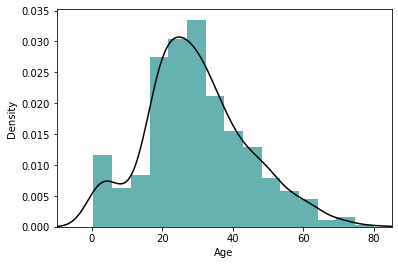

In [11]:
ax = df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
df["Age"].plot(kind='density', color='black')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

Looking at the graph, we observe that we can use the median value  of age to impute missign values

In [12]:
median_age = df["Age"].median()
print ("Median Age : ", median_age)

Median Age :  28.0


=> Cabin : since 687/891 values are missing in this field, imputing missign values would not be good idea.

In [13]:
print ("we ignore Cabin feature from the data")

we ignore Cabin feature from the data


### Final Handling 

In [14]:
data = df.copy()
data["Age"].fillna(median_age, inplace=True)
data["Embarked"].fillna(most_common_embarked, inplace=True)
data.drop('Cabin', axis=1, inplace=True)

In [15]:
# Data handled
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [16]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Feature Reduction :

In [17]:
# sibsp :  Number of Siblings/Spouses Aboard
# parch :  Number of Parents/Children Aboard
# Looking at this, we can create one categorical variable if the passenfer has any family members aboard or he/she is travelling alone, and drop these 2 features

data['TravelAlone']=np.where((data["SibSp"]+data["Parch"])>0, 0, 1)
data.drop('SibSp', axis=1, inplace=True)
data.drop('Parch', axis=1, inplace=True)

In [18]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,TravelAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,1


In [19]:
# Check features which needs to be converted to categorical variable
print ("Sex  :", data.Sex.unique())
print ("Embarked : ", data.Embarked.unique())
print ("PClass : ", data.Pclass.unique())

Sex  : ['male' 'female']
Embarked :  ['S' 'C' 'Q']
PClass :  [3 1 2]


In [20]:
# converting to categorical variable
converted_data =pd.get_dummies(data, columns=["Pclass","Embarked","Sex"])
converted_data.head()

,PassengerId,Survived,Name,Age,Ticket,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,0,0,0,1,0,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,0,1,0,0,1,0,0,1,0
2,3,1,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,1,0,0,1,0,0,1,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,0,1,0,0,0,0,1,1,0
4,5,0,"Allen, Mr. William Henry",35.0,373450,8.0500,1,0,0,1,0,0,1,0,1


In [21]:
# dropping features which are of no use :

#since "sex" has binary output values, only 1 feature is needed, therefore droppping female_sex. Similary with PClass and Embarked
converted_data.drop('Sex_female', axis=1, inplace=True)
converted_data.drop('Pclass_3', axis=1, inplace=True)
converted_data.drop('Embarked_S', axis=1, inplace=True)


# Also PassenderId and Name will have no impact on passenger's survival prediction, therefore dropping it
converted_data.drop('PassengerId', axis=1, inplace=True)
converted_data.drop('Name', axis=1, inplace=True)

# Since ticket and fare are closely related, choosing one only, to avoid overfitting 
converted_data.drop('Ticket', axis=1, inplace=True)

final_data = converted_data

In [22]:
# Now we have good and cleaned dataset, containing only important features.
final_data.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Embarked_C,Embarked_Q,Sex_male
0,0,22.0,7.2500,0,0,0,0,0,1
1,1,38.0,71.2833,0,1,0,1,0,0
2,1,26.0,7.9250,1,0,0,0,0,0
3,1,35.0,53.1000,0,1,0,0,0,0
4,0,35.0,8.0500,1,0,0,0,0,1


In [23]:
# seperating independent and dependent varibles, i.e., X and y:

all_cols = final_data.columns
a = list(all_cols)
a.remove("Survived")
selected_features = a
target_feature = "Survived"
print("\nselected features : ", selected_features)
print("\ntarget feature : ", target_feature)


selected features :  ['Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_Q', 'Sex_male']

target feature :  Survived


In [24]:
X = final_data[selected_features]
y = final_data[target_feature]
y = np.array(y)

In [25]:
from sklearn.preprocessing import MinMaxScaler
x_array = np.array(X)
scaler = MinMaxScaler()
scaler.fit(x_array)
x_array = scaler.transform(x_array)

### Splitting dataset into train:test = 70:30

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x_array, y, test_size=0.3, random_state=12)

In [27]:
print("x train shape : ", X_train.shape)
print("y train shape : ", y_train.shape)

x train shape :  (623, 8)
y train shape :  (623,)


In [33]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
print (y_train.shape)
y_test.shape

(623, 1)


(268, 1)

### Applying my custom Logistic Regression model

In [34]:
lg = myLogisticRegression(n_iter=1000, lr=0.07, num_classes=1)
lg.fit(X_train, y_train)

predicted = lg.predict(X_test)
acc = lg.get_accuracy(y_test, predicted)
print("accuracy : ", acc)

total iteration :  1000
accuracy :  78.35820895522389


len : self.cost_each_class  1000


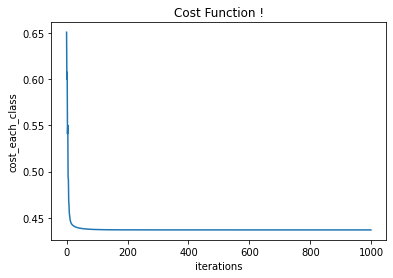

In [35]:
lg.plot_cost_function()

In [38]:
report = classification_report(y_test, predicted)
print("\nclassification_report : \n", report)

cm = confusion_matrix(y_test, predicted)
print("confusion matrix : \n", cm)


classification_report : 
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       161
           1       0.75      0.69      0.72       107

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268

confusion matrix : 
 [[136  25]
 [ 33  74]]


<AxesSubplot:>

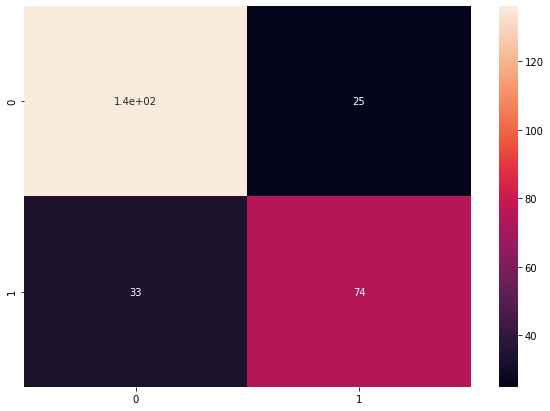

In [39]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)